### Documentations 

- https://newscatcherapi.com/blog/python-web-scraping-libraries-to-mine-news-data
    

### Use google news 

In [2]:
from pygooglenews import GoogleNews
import json
import time

- get top news 

In [3]:
gn = GoogleNews()
top = gn.top_news()

In [18]:
entries = top["entries"]
count = 0
print(entries[0].keys)
for entry in entries[:5]:
  count = count + 1
  print(
    str(count) + ". " + entry["title"] + entry["published"] + "; " +entry["link"]
  )
  time.sleep(0.25)

<built-in method keys of FeedParserDict object at 0x00000235E843D090>
1. Durham report: FBI criticised by special counsel for Trump-Russia inquiry - BBCMon, 15 May 2023 22:16:03 GMT; https://news.google.com/rss/articles/CBMiMWh0dHBzOi8vd3d3LmJiYy5jb20vbmV3cy93b3JsZC11cy1jYW5hZGEtNjU2MDI5MDnSATVodHRwczovL3d3dy5iYmMuY29tL25ld3Mvd29ybGQtdXMtY2FuYWRhLTY1NjAyOTA5LmFtcA?oc=5
2. New Mexico shooting: 3 dead, 2 wounded in Farmington attack - NBC NewsMon, 15 May 2023 22:46:54 GMT; https://news.google.com/rss/articles/CBMidWh0dHBzOi8vd3d3Lm5iY25ld3MuY29tL25ld3MvdXMtbmV3cy9mYXJtaW5ndG9uLW5ldy1tZXhpY28tc2hvb3RpbmctbGVhc3QtMy1wZW9wbGUta2lsbGVkLTItb2ZmaWNlcnMtd291bmRlLXJjbmE4NDU0MNIBKmh0dHBzOi8vd3d3Lm5iY25ld3MuY29tL25ld3MvYW1wL3JjbmE4NDU0MA?oc=5
3. Democratic congressman's staff attacked by man with baseball bat - CNNMon, 15 May 2023 23:59:00 GMT; https://news.google.com/rss/articles/CBMiUmh0dHBzOi8vd3d3LmNubi5jb20vMjAyMy8wNS8xNS9wb2xpdGljcy9nZXJyeS1jb25ub2xseS1zdGFmZmVyLWF0dGFja2VkL2luZGV4Lmh0bWzSAV

- To get the top headlines related to “Business” or you could have replaced it with “gn.geo_headlines('San Fran')” to get the top news in the San Fransisco region.


In [29]:
biz = gn.topic_headlines('business')
print(biz['entries'][0].keys())
print("title: {}; \n Link: {}".format(
    biz['entries'][0]['title'],
    #biz['entries'][0]['summary'],
    biz['entries'][0]['link'],
))

dict_keys(['title', 'title_detail', 'links', 'link', 'id', 'guidislink', 'published', 'published_parsed', 'summary', 'summary_detail', 'source', 'sub_articles'])
title: Elon Musk documents subpoenaed in Jeffrey Epstein lawsuit by U.S. Virgin Islands - Reuters; 
 Link: https://news.google.com/rss/articles/CBMia2h0dHBzOi8vd3d3LnJldXRlcnMuY29tL2xlZ2FsL3VzLXZpcmdpbi1pc2xhbmRzLXN1YnBvZW5hZWQtZWxvbi1tdXNrLWplZmZyZXktZXBzdGVpbi1saXRpZ2F0aW9uLTIwMjMtMDUtMTUv0gEA?oc=5


In [31]:
gs = gn.search('boeing OR airbus')
print(gs['entries'][0].keys())

dict_keys(['title', 'title_detail', 'links', 'link', 'id', 'guidislink', 'published', 'published_parsed', 'summary', 'summary_detail', 'source', 'sub_articles'])


### NewsCatcher

In [32]:
from newscatcher import Newscatcher, describe_url

In [40]:
nyt = Newscatcher(website = 'nytimes.com')
results = nyt.get_news()
results['articles'][0].keys()

dict_keys(['title', 'title_detail', 'links', 'link', 'id', 'guidislink', 'summary', 'summary_detail', 'authors', 'author', 'author_detail', 'published', 'published_parsed', 'tags', 'media_content', 'media_credit', 'credit', 'content'])

In [47]:
results['articles'][0]['summary']

'His trips to Britain, Germany, France and Italy demonstrated the shifting political landscape when it comes to supporting Kyiv, as concerns grow about U.S. backing as the presidential election looms.'

In [46]:
count = 0
articles = results['articles']
for article in articles[:2]:   
   count+=1
   print(
     str(count) + ". " + article["title"] \
     + "\n\t\t" + article["published"] \
     + "\n\t\t" + article["link"]\
     + "\n\n"
     )
   time.sleep(0.33)

1. In European Tour, Zelensky Reaps Billions More in Promised Military Aid
		Tue, 16 May 2023 00:08:31 +0000
		https://www.nytimes.com/2023/05/15/world/europe/ukraine-war-zelensky-foreign-aid.html


2. Former U.S. Embassy Employee Is Being Held in Moscow, Russian State News Says
		Tue, 16 May 2023 00:32:34 +0000
		https://www.nytimes.com/2023/05/15/world/europe/robert-shonov-detained-russia-moscow.html




### News3k extral the actual body of news, can combine with all previous tools 

In [ ]:
import newspaper
import json

In [53]:
## try an article from previously retrieved news article 
url = articles[0]["link"]
#url = 'https://www.nytimes.com/live/2021/10/25/us/biden-spending-bill-negotiations'
  
article = newspaper.Article(url=url, language='en')
article.download()
article.parse()

article ={
    "title": str(article.title),
    "text": str(article.text),
    "authors": article.authors,
    "published_date": str(article.publish_date),
    "top_image": str(article.top_image),
    "videos": article.movies,
    "keywords": article.keywords,
    "summary": str(article.summary)
}


print(article["title"] \
     + "\n\t\t" + article["published_date"] \
     + "\n\n"\
     + "\n" + article["text"]\
     + "\n\n")

In European Tour, Zelensky Reaps Billions More in Promised Military Aid
		2023-05-15 00:00:00


President Volodymyr Zelensky of Ukraine has been promised billions of dollars in new military aid during a whirlwind tour of European allies that reflects a striking shift in the political landscape, as Europe takes a more central role in arming Ukraine for its anticipated counteroffensive to drive Russia from its territory.

Mr. Zelensky’s four-country tour began in Italy on Saturday and ended in Britain on Monday, when Prime Minister Rishi Sunak pledged to provide a major package of air-defense missiles and attack drones. That was in addition to Britain’s recent delivery of long-range cruise missiles. And it followed Germany’s pledge to give Ukraine a nearly $3 billion package of weapons, as well as less concrete promises of additional weapons from France and Italy.

Europe’s show of support for Ukraine, analysts said, underscores that the war is in a pivotal phase, with Ukrainian forces m

### GDELT
- https://github.com/alex9smith/gdelt-doc-api
- I think it is using the full text search api end point:
https://blog.gdeltproject.org/announcing-the-gdelt-full-text-search-api/

In [54]:
from gdeltdoc import GdeltDoc, Filters

In [69]:
f = Filters(
    keyword = "climate change",
    start_date = "2022-01-10",
    end_date = "2023-01-10"
)

gd = GdeltDoc()

# Search for articles matching the filters
articles = gd.article_search(f)

# Get a timeline of the number of articles matching the filters
timeline = gd.timeline_search("timelinevol", f)

In [83]:
articles.columns

Index(['url', 'url_mobile', 'title', 'seendate', 'socialimage', 'domain',
       'language', 'sourcecountry'],
      dtype='object')

In [70]:
articles.head()

,url,url_mobile,title,seendate,socialimage,domain,language,sourcecountry
0,https://allafrica.com/stories/202301050112.html,,Nigeria : Environmentalist Seeks Adoption of R...,20230105T101500Z,,allafrica.com,English,Nigeria
1,https://www.kompas.com/tren/read/2022/12/24/10...,https://amp.kompas.com/tren/read/2022/12/24/10...,Solusi terhadap Kegagalan Iptek Tentang Peruba...,20221224T034500Z,https://asset.kompas.com/crops/VjPBa0yy7Cq-sXn...,kompas.com,Indonesian,Indonesia
2,https://www.cma.gov.cn/2011xwzx/2011xqxxw/2011...,,2022年气候变化绿皮书发布 聚焦落实 双碳 目标的政策和实践 - 中国气象局政府门户网站,20221221T153000Z,,cma.gov.cn,Chinese,China
3,https://markets.buffalonews.com/buffnews/artic...,,Stock Market,20221223T210000Z,,markets.buffalonews.com,English,United States
4,https://www.huffingtonpost.es/entry/nadie-pens...,https://www.huffingtonpost.es/amp/entry/nadie-...,Nadie pensó que este inocente tuit de Alejandr...,20230105T201500Z,https://img.huffingtonpost.com/asset/63b7215e1...,huffingtonpost.es,Spanish,Spain


<AxesSubplot:xlabel='datetime'>

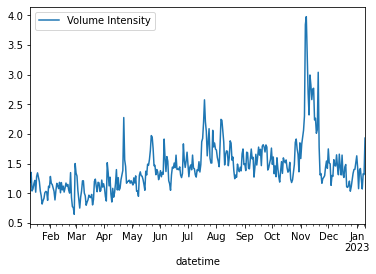

In [71]:
timeline.plot(x='datetime',y='Volume Intensity')

In [75]:
for u in articles.head(20)['url']:
    try:
        article = newspaper.Article(url=u, language='en')
        article.download()
        article.parse()
        print(article.title)
    except:
        print('failed:{}'.format(u))

Nigeria: Environmentalist Seeks Adoption of Renewable Energy
Solusi terhadap Kegagalan Iptek Tentang Perubahan Iklim
2022年气候变化绿皮书发布 聚焦落实“双碳”目标的政策和实践-中国气象局政府门户网站
failed:https://markets.buffalonews.com/buffnews/article/sbwire-2022-12-23-climate-change-consulting-market-seeking-excellent-growth-coastal-risk-consulting-mckinsey-and-company-pricewaterhousecoopers
Nadie pensó que este inocente tuit de Alejandro Sanz iba a recibir la misma respuesta tantas veces
failed:https://www.sott.net/article/475485-Intelligence-and-attitudes-to-climate-change
Mauritius: Ad584 - Climate Change Making Life Worse in Mauritius - Citizens Want Collective Action to Combat It
专注解决气候变化 聂纳兹米：尽力提供防洪援助
Climate impacts are increasing; textbooks aren't keeping pace
Transilience: A New Way to Think About Climate Change
[HOAKS] WEF Menyerukan Pembantaian Kucing dan Anjing untuk Lawan Perubahan Iklim
Inilah 7 Faktor yang Menyebabkan Terjadinya Perubahan Iklim
IAPI: Akuntan Publik Dituntut Memiliki Peran dalam Memitigas

- #### A more complete package :
- https://github.com/linwoodc3/gdeltPyR
- https://towardsdatascience.com/making-sense-of-the-news-part-1-introduction-f171d1da65a8
- https://nbviewer.org/github/JamesPHoughton/Published_Blog_Scripts/blob/master/GDELT%20Wrangler%20-%20Clean.ipynb

In [77]:
import gdelt

In [78]:
# Version 2 queries
gd2 = gdelt.gdelt(version=2)

# Single 15 minute interval pull, output to json format with mentions table
#results = gd2.Search('2022 Nov 1',table='mentions',output='json')
#print(len(results))

# Full day pull, output to pandas dataframe, events table
results = gd2.Search(['2022 11 01'],table='events',coverage=True)
print(len(results))

1579837
105272


In [82]:
results.columns

Index(['GLOBALEVENTID', 'SQLDATE', 'MonthYear', 'Year', 'FractionDate',
       'Actor1Code', 'Actor1Name', 'Actor1CountryCode', 'Actor1KnownGroupCode',
       'Actor1EthnicCode', 'Actor1Religion1Code', 'Actor1Religion2Code',
       'Actor1Type1Code', 'Actor1Type2Code', 'Actor1Type3Code', 'Actor2Code',
       'Actor2Name', 'Actor2CountryCode', 'Actor2KnownGroupCode',
       'Actor2EthnicCode', 'Actor2Religion1Code', 'Actor2Religion2Code',
       'Actor2Type1Code', 'Actor2Type2Code', 'Actor2Type3Code', 'IsRootEvent',
       'EventCode', 'CAMEOCodeDescription', 'EventBaseCode', 'EventRootCode',
       'QuadClass', 'GoldsteinScale', 'NumMentions', 'NumSources',
       'NumArticles', 'AvgTone', 'Actor1Geo_Type', 'Actor1Geo_FullName',
       'Actor1Geo_CountryCode', 'Actor1Geo_ADM1Code', 'Actor1Geo_ADM2Code',
       'Actor1Geo_Lat', 'Actor1Geo_Long', 'Actor1Geo_FeatureID',
       'Actor2Geo_Type', 'Actor2Geo_FullName', 'Actor2Geo_CountryCode',
       'Actor2Geo_ADM1Code', 'Actor2Geo_ADM2Code

In [81]:
results.head()

,GLOBALEVENTID,SQLDATE,MonthYear,Year,FractionDate,Actor1Code,Actor1Name,Actor1CountryCode,Actor1KnownGroupCode,Actor1EthnicCode,...,ActionGeo_Type,ActionGeo_FullName,ActionGeo_CountryCode,ActionGeo_ADM1Code,ActionGeo_ADM2Code,ActionGeo_Lat,ActionGeo_Long,ActionGeo_FeatureID,DATEADDED,SOURCEURL
0,1070057957,20211101,202111,2021,2021.8247,BHR,BAHRAIN,BHR,NaN,NaN,...,1,Bahrain,BA,BA,NaN,26.0,50.5,BA,20221101010000,http://www.ttnworldwide.com/Article/340259/-Ai...
1,1070057958,20211101,202111,2021,2021.8247,CHN,CHINESE,CHN,NaN,NaN,...,1,China,CH,CH,NaN,35.0,105.0,CH,20221101010000,https://www.fool.com/investing/2022/10/31/why-...
2,1070057959,20211101,202111,2021,2021.8247,CHNGOV,CHINESE,CHN,NaN,NaN,...,1,China,CH,CH,NaN,35.0,105.0,CH,20221101010000,https://www.fool.com/investing/2022/10/31/why-...
3,1070057960,20211101,202111,2021,2021.8247,CVL,TOURIST,NaN,NaN,NaN,...,1,Bahrain,BA,BA,NaN,26.0,50.5,BA,20221101010000,http://www.ttnworldwide.com/Article/340259/-Ai...
4,1070057961,20211101,202111,2021,2021.8247,GBR,UNITED KINGDOM,GBR,NaN,NaN,...,1,Ireland,EI,EI,NaN,53.0,-8.0,EI,20221101010000,http://www.ttnworldwide.com/Article/340218/Bac...
